In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Df=pd.read_csv('Clean_Dataset.csv')

In [3]:
Df.head()

,Index,airline,flight,departure_time,stops,arrival_time,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Evening,zero,Night,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,3,Vistara,UK-995,Morning,zero,Afternoon,Economy,2.25,1,5955
4,4,Vistara,UK-963,Morning,zero,Morning,Economy,2.33,1,5955


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6670 entries, 0 to 6669
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           6670 non-null   int64  
 1   airline         6670 non-null   object 
 2   flight          6670 non-null   object 
 3   departure_time  6670 non-null   object 
 4   stops           6670 non-null   object 
 5   arrival_time    6670 non-null   object 
 6   class           6670 non-null   object 
 7   duration        6670 non-null   float64
 8   days_left       6670 non-null   int64  
 9   price           6670 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 521.2+ KB


In [5]:
Df.isnull().sum()

Index             0
airline           0
flight            0
departure_time    0
stops             0
arrival_time      0
class             0
duration          0
days_left         0
price             0
dtype: int64

In [6]:
Df.describe()

,Index,duration,days_left,price
count,6670.00000,6670.000000,6670.000000,6670.000000
mean,3334.50000,9.558291,18.150375,6803.713793
std,1925.60748,7.148531,9.246545,4217.359645
min,0.00000,2.000000,1.000000,2409.000000
25%,1667.25000,2.330000,11.000000,3631.000000
50%,3334.50000,7.670000,18.000000,5954.000000
75%,5001.75000,13.830000,26.000000,8656.250000
max,6669.00000,30.080000,34.000000,31260.000000


In [7]:
Df=Df.drop('Index',axis=1)

In [8]:
Df=Df.drop('flight',axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e652b8ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e652d8580>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e652ada90>],
 'medians': [<matplotlib.lines.Line2D at 0x20e652d8a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e652d8d30>],
 'means': []}

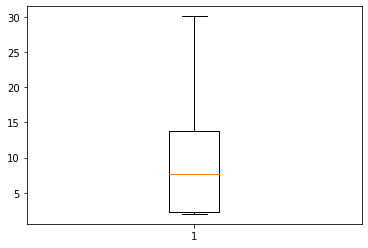

In [9]:
plt.boxplot(Df.duration)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e653c0e80>,
 'caps': [<matplotlib.lines.Line2D at 0x20e653d0490>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e653c0bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e653d0a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e653d0d30>],
 'means': []}

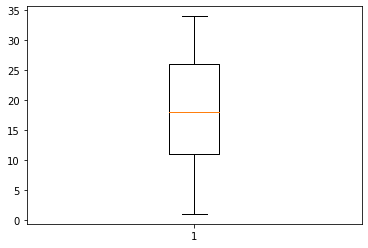

In [10]:
plt.boxplot(Df.days_left)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e654394f0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e65439a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e65439220>],
 'medians': [<matplotlib.lines.Line2D at 0x20e65447070>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e65447370>],
 'means': []}

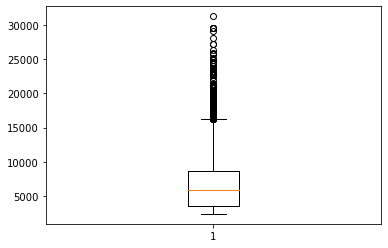

In [11]:
plt.boxplot(Df.price)

In [12]:
# method 1.
Q1 = np.percentile(Df.price , 25)
Q3 = np.percentile(Df.price, 75)
print(Q1)
print(Q3)

# Finding inter quartile range for Selling_price
IQR = Q3 - Q1
ul = Q3 +1.5*IQR
ll  = Q1 -1.5*IQR
print(ul )
print(ll )

3631.0
8656.25
16194.125
-3906.875


In [13]:
#droping the outlier 
Df= Df[(Df["price"] < ul) & (Df["price"] > ll)]

In [14]:
Df

,airline,departure_time,stops,arrival_time,class,duration,days_left,price
0,SpiceJet,Evening,zero,Night,Economy,2.17,1,5953
1,SpiceJet,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,AirAsia,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,Vistara,Morning,zero,Afternoon,Economy,2.25,1,5955
4,Vistara,Morning,zero,Morning,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...
6665,SpiceJet,Early_Morning,zero,Morning,Economy,2.25,34,2621
6666,Vistara,Early_Morning,zero,Morning,Economy,2.25,34,3100
6667,Vistara,Evening,zero,Night,Economy,2.25,34,3100
6668,Vistara,Morning,zero,Morning,Economy,2.33,34,3100


In [46]:
#Resetting index
Df.reset_index(drop=True, inplace=True)

<BarContainer object of 6448 artists>

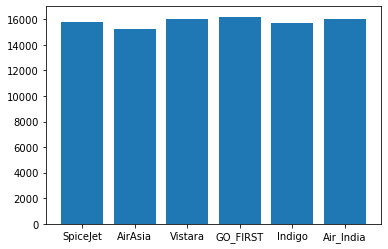

In [15]:
plt.bar(Df.airline,Df.price)

<BarContainer object of 6448 artists>

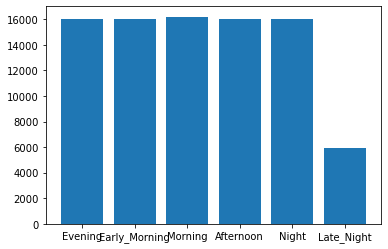

In [16]:
plt.bar(Df.departure_time,Df.price)

<BarContainer object of 6448 artists>

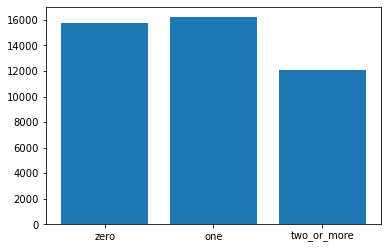

In [17]:
plt.bar(Df.stops,Df.price)

<BarContainer object of 6448 artists>

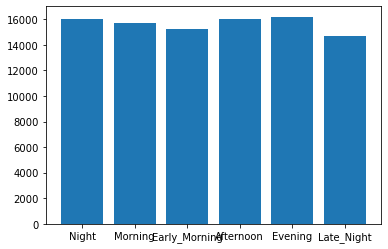

In [18]:
plt.bar(Df.arrival_time,Df.price)

<BarContainer object of 6448 artists>

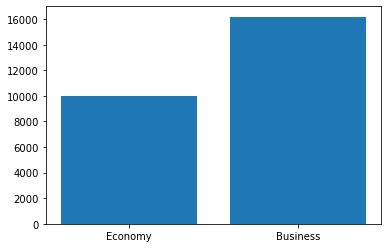

In [19]:
plt.bar(Df['class'],Df['price'])

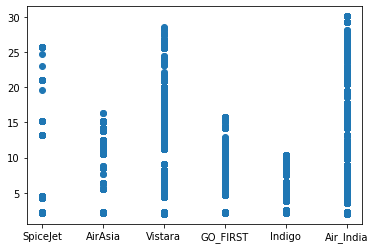

In [20]:
plt.scatter(Df.airline,Df['duration'])

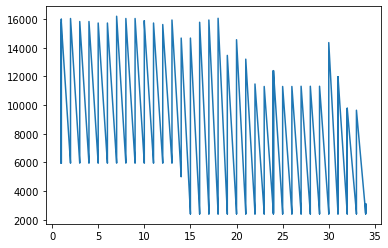

In [21]:
plt.plot(Df.days_left,Df.price)

In [23]:
count=0
for i in Df['class']:
    if i=='Business':
        count+=1
print(count)

1230


In [24]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [25]:
Df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [26]:
Df['airline']=Le.fit_transform(Df.airline)
Df['airline'].unique()

#'SpiceJet'=4, 'AirAsia'=0, 'Vistara'=5, 'GO_FIRST'=2, 'Indigo'=3,'Air_India'=1

array([4, 0, 5, 2, 3, 1])

In [27]:
Df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [28]:
Df['departure_time']=Le.fit_transform(Df.departure_time)
Df['departure_time'].unique()

#'Evening'=2, 'Early_Morning'=1, 'Morning'=4, 'Afternoon'=0, 'Night'=5,'Late_Night'=3

array([2, 1, 4, 0, 5, 3])

In [29]:
Df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [30]:
Df['stops']=Le.fit_transform(Df.stops)
Df['stops'].unique()

#'zero'=2, 'one'=0, 'two_or_more'=1

array([2, 0, 1])

In [31]:
Df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [32]:
Df['arrival_time']=Le.fit_transform(Df.arrival_time)
Df['arrival_time'].unique()

#'Night'=5, 'Morning'=4, 'Early_Morning'=1, 'Afternoon'=0, 'Evening'=2,'Late_Night'=3

array([5, 4, 1, 0, 2, 3])

In [33]:
Df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [34]:
Df['class']=Le.fit_transform(Df['class'])
Df['class'].unique()

#'Economy'=1, 'Business'=0

array([1, 0])

In [35]:
X=Df.drop('price',axis=1)
Y=Df['price']

In [36]:
from sklearn.model_selection import train_test_split

# Splitting the data into a training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [37]:
#building a model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(X_train,Y_train)

LinearRegression()

In [40]:
Pred=lr.predict(X_test)

In [41]:
Pred

array([ 3821.10643418,  5192.75284494,  5077.49613321,  6135.62176091,
        6031.67115046,  4114.1245563 ,  6012.12633265,  5383.47588925,
        5356.5537311 ,  5807.63300817,  2521.22705078, 12080.02603098,
        6173.31048195,  5345.4562738 ,  5567.77619295,  2198.13374647,
        4912.01845467,  6070.98764872,  4031.18080973,  4173.06821826,
        6026.126229  ,  6246.04458641,  6978.6170806 ,  6968.58919571,
        4446.2512547 , 12770.13202978,  4804.2357496 ,  6305.04715451,
        2859.05779638,  4696.61595149,  5475.9506675 ,  6398.77128617,
        4256.04094919,  6028.2443781 ,  4740.71927891,  2377.20058424,
        4056.73667867,  4706.36439209,  5328.645432  ,  4962.99725705,
        7072.76409705,  3795.1717056 ,  3168.59973493,  2351.7455832 ,
        5512.26876166, 12938.83449616,  6414.18377115, 13223.55958873,
        4069.92039518,  6778.84871473,  5566.65357345,  5561.47161491,
        6116.19076056,  4837.74244902,  4819.97316202,  5985.01394481,
      

In [42]:
r2_score(Y_test,Pred)

0.7993495531085

In [53]:
# trying to impore model accuarcy by trying to find best value for random_state
scores=[]
for i in range(1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    Pred=lr.predict(X_test)
    scores.append(r2_score(Y_test,Pred))

In [54]:
# chaking best value of random state 
np.argmax(scores)

960

In [55]:
# accurcay of best value 
scores[np.argmax(scores)]

0.8430389987635337

In [56]:
# Splitting the data into a training and test set
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.1,random_state=np.argmax(scores))

In [57]:
lin_reg=LinearRegression()

In [59]:
lin_reg.fit(X_train1,Y_train1)

LinearRegression()

In [63]:
Pred1=lin_reg.predict(X_test1)

In [64]:
Pred1

array([ 3169.80521764,  5698.9437589 ,  5356.05833522,  6125.44936899,
        4756.90051322,  3038.78556747,  6044.9491269 ,  4935.17676176,
        5071.04827669,  5622.48003478,  3758.44627778,  4306.01436373,
       12257.77399941,  2968.95120016,  5504.74567065,  4507.55913637,
       11529.47106858,  6212.7134223 ,  6165.79115663,  6200.39111519,
        5439.97598818, 12178.87936935,  2993.42802723,  6150.63039908,
        5078.17879102, 12462.42215325,  4890.36999866,  5578.424373  ,
       11139.35072792, 12882.35208916,  5441.7371262 ,  4287.45028877,
       11818.31037365, 12181.01014975, 10455.59138159,  3266.12987212,
        4227.92963104,  5254.59957934,  2322.55526684,  5337.89264001,
        3883.07938414, 11647.48171292,  4034.17160354,  6935.65701151,
        3729.3354774 , 12366.80524728,  6884.67824734,  5234.47601995,
       12894.75909067, 12497.36582721,  6557.62224729, 11633.72313003,
        6043.51285112,  3238.47662526,  2411.06705986,  3262.95345233,
      

In [65]:

r2_score(Y_test1,Pred1)

0.8430389987635337

In [71]:
prediction=lin_reg.predict([[5,5,0,5,0,26.67,3]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
prediction

array([13547.32129295])

In [76]:
Testing model end to end 

print("'SpiceJet'=4, 'AirAsia'=0, 'Vistara'=5, 'GO_FIRST'=2, 'Indigo'=3,'Air_India'=1")
i = str(input('Enetre airline above list:'))

airline=0
print("your entered airline is:",i)

if i=='SpiceJet':
    airline=4
elif i == 'AirAsia':
    airline=0
elif i == 'Vistara':
    airline=5
elif i=='GO_FIRST':
    airline=2
elif i=='Indigo':
    airline=3
elif i=='Air_India':
    airline=1
print("your airline value is:",airline)

print(" --------")


print("'Evening'=2, 'Early_Morning'=1, 'Morning'=4, 'Afternoon'=0, 'Night'=5,'Late_Night'=3")
j=str(input("Enetre departure_time From above list:"))
departure_time=0
print("your entered departure_time is:",j)
if j=='Evening':
    departure_time=2
elif j=='Early_Morning':
    departure_time=1
elif j=='Morning':
    departure_time=4
elif j=='Afternoon':
    departure_time=0
elif j=='Night':
    departure_time=5
elif j=='Late_Night':
    departure_time=3

print("Your departure_time value is:",departure_time)
print(" --------")


print("'zero'=2, 'one'=0, 'two_or_more'=1")
k=str(input("Enter your stops from above list:"))
stops=0

print("your entered stops is:",k)
if k=='zero':
    stops=2
elif k=='one':
    stops=0
elif k=='two_or_more':
    stops=1
    
print("Your stope value is:",stops)
print("--------")


print("'Evening'=2, 'Early_Morning'=1, 'Morning'=4, 'Afternoon'=0, 'Night'=5,'Late_Night'=3")
l=str(input("Enetre arrival_time From above list:"))
arrival_time=0
print("your arrival_time is:",l)
if l=='Evening':
    arrival_time=2
elif l=='Early_Morning':
    arrival_time=1
elif l=='Morning':
    arrival_time=4
elif l=='Afternoon':
    arrival_time=0
elif l=='Night':
    arrival_time=5
elif l=='Late_Night':
    arrival_time=3

print("Your arrival_time value is:",arrival_time)
print(" --------")




print("'Economy'=1, 'Business'=0")
m=str(input("Enter your class from above list:"))
c=0

print("your entered class is:",m)
if m=='Economy':
    c=1
elif m=='Business':
    c=0
    
print("Your class value is:",c)
print("--------")


duration=float(input("Enter A duration vlaue:"))
print('your entered duration value is:',duration)
print("----------")


days_left=float(input("Enter A days_left vlaue:"))
print('your entered days_left value is:',days_left)

print("----------")



result1=lin_reg.predict([[airline,departure_time,stops,arrival_time,c,duration,days_left]])
print("Your Flight Price is:",result1)

'SpiceJet'=4, 'AirAsia'=0, 'Vistara'=5, 'GO_FIRST'=2, 'Indigo'=3,'Air_India'=1
Enetre airline above list:Air_India
your entered airline is: Air_India
your airline value is: 1
 --------
'Evening'=2, 'Early_Morning'=1, 'Morning'=4, 'Afternoon'=0, 'Night'=5,'Late_Night'=3
Enetre departure_time From above list:Morning
your entered departure_time is: Morning
Your departure_time value is: 4
 --------
'zero'=2, 'one'=0, 'two_or_more'=1
Enter your stops from above list:two_or_more
your entered stops is: two_or_more
Your stope value is: 1
--------
'Evening'=2, 'Early_Morning'=1, 'Morning'=4, 'Afternoon'=0, 'Night'=5,'Late_Night'=3
Enetre arrival_time From above list:Afternoon
your arrival_time is: Afternoon
Your arrival_time value is: 0
 --------
'Economy'=1, 'Business'=0
Enter your class from above list:Business
your entered class is: Business
Your class value is: 0
--------
Enter A duration vlaue:4.5
your entered duration value is: 4.5
----------
Enter A days_left vlaue:5
your entered days_le

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:
#saving the model
import pickle
pickle.dump(lin_reg, open('./Flight_Price_Model.sav', 'wb'))